# Bài tập lớn 2: Học máy với dữ liệu dạng văn bản  
### Môn: Học máy (Machine Learning) – Thực hành  
### Nhóm: ML4U
### Dataset: [McDonald's Store Reviews](https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews/data) (Kaggle)

---

## 🧩 Tổng quan đề tài

Mục tiêu của bài tập này là **xây dựng pipeline học máy hoàn chỉnh cho dữ liệu văn bản**, bao gồm:
1. **Tiền xử lý văn bản** (loại bỏ ký tự đặc biệt, chuyển chữ thường, tokenization, stopword removal, padding,...).  
2. **Trích xuất đặc trưng văn bản** bằng **hai hướng tiếp cận chính**:
   - **Phương pháp truyền thống**: Bag-of-Words (BoW) và TF-IDF + n-gram.
   - **Phương pháp hiện đại (Deep Learning Embedding)**: Sử dụng mô hình ngôn ngữ huấn luyện sẵn như **DistilBERT** để biểu diễn ngữ nghĩa sâu hơn.
3. **Huấn luyện và đánh giá mô hình phân loại** với các thuật toán khác nhau:  
   - **Naive Bayes**, **Logistic Regression**, **SVM** (với BoW/TF-IDF).  
   - **RNN**, **LSTM** và **Fine-tuning DistilBERT** (với embedding học sâu).

---

## 📊 Dataset sử dụng: McDonald's Store Reviews

Bộ dữ liệu được thu thập từ Kaggle, bao gồm **các đánh giá (reviews)** của khách hàng về **các cửa hàng McDonald’s** trên toàn cầu.  
Đặc điểm nổi bật:
- **Dạng dữ liệu:** Văn bản (text) + nhãn đánh giá (rating).  
- **Số lượng mẫu:** xấp xỉ 33,000 mẫu.  
- **Đa dạng nội dung:** Mỗi review thể hiện cảm xúc tích cực, trung tính hoặc tiêu cực, giúp phù hợp cho bài toán **phân loại cảm xúc (sentiment classification)**.  
- **Ứng dụng thực tế:** Phân tích cảm xúc khách hàng, hỗ trợ cải thiện dịch vụ.

---

## ⚙️ Kế hoạch triển khai

1. **Phân tích dữ liệu (EDA):**  
   - Thống kê độ dài trung bình review, tần suất từ, biểu đồ phân phối nhãn.
2. **Tiền xử lý:**  
   - Tokenization, stopword removal, stemming/lemmatization, padding.  
3. **Trích xuất đặc trưng:**  
   - BoW & TF-IDF + n-gram.  
   - DistilBERT embeddings.  
4. **Huấn luyện mô hình:**  
   - Truyền thống: NB, Logistic Regression, SVM.  
   - Deep learning: RNN, LSTM và fine-tune DistilBERT.  
5. **So sánh và đánh giá:**  
   - Accuracy, F1-score.  
   - Bàn luận ưu/nhược điểm giữa hai hướng tiếp cận và từng giải thuật/phương pháp.


## Mục 1: Thiết lập môi trường làm việc
> ⚠️ **Lưu ý khi chạy notebook:**  
> - **Bước này cần được chạy riêng (một mình trong một cell).**  
> - Sau khi chạy xong, **bạn phải khởi động lại phiên làm việc (Runtime → Restart Runtime)** để đảm bảo phiên bản `numpy==1.26.4` được áp dụng ổn định cho toàn bộ môi trường.  
> - Nếu bỏ qua bước này, các thư viện khác (đặc biệt là `gensim`, `pytorch_tabnet`) có thể gặp lỗi không tương thích.

In [ ]:
!pip install gdown -q
!pip install numpy==1.26.4 wordcloud gensim nltk tabpfn pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully

## Mục 1.1: Tải mã nguồn và dữ liệu từ GitHub

In [ ]:
!git clone -b btl2 https://github.com/caoTayTang/ML251.git
%cd ML251

Cloning into 'ML251'...
remote: Enumerating objects: 28072, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 28072 (delta 26), reused 31 (delta 14), pack-reused 28004 (from 4)
Receiving objects: 100% (28072/28072), 530.47 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (435/435), done.
Updating files: 100% (24364/24364), done.
/content/ML251


## Mục 2: Import thư viện và cấu hình ban đầu

Ở bước này, ta tiến hành **import các thư viện cần thiết** cho toàn bộ notebook.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gdown

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import shutil
from IPython.display import display
from ML251.modules.unified_pipeline import ExperimentRunner
from scipy.stats import loguniform

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Mục 2.1: Tải các tệp embedding và mô hình fine-tune

Tải về các **đặc trưng embedding** và **checkpoint mô hình đã fine-tune** từ Google Drive, để phục vụ cho quá trình huấn luyện, so sánh và đánh giá sau này.


In [ ]:
url = "https://drive.google.com/drive/folders/1GYsoiFaX4MgkZqs5PpiU3NIrk5GoABZW"
gdown.download_folder(url, quiet=False, use_cookies=False)

Retrieving folder contents


Retrieving folder 10BtvwwFByKMlUlTf380tEL6HULv3p4l9 features
Processing file 1wWKImnXbiOFtbzjTvV_THq3Hh6enKEso bert_sequence.npz
Processing file 14q_RDsONSTLh7kNGMVO8GZ6zhTi0huay bert_static.npz
Processing file 1jELXIqTanrt97nZNUkR0VR0gr40DXPkC bow_test_bigram.npz
Processing file 1xPkEUblPjv0ny7SGrqs9dBPKkiDbtn4f bow_test_trigram.npz
Processing file 1S9Qz3kHXB-v3Y8hYije2vlJEbFTwdqly bow_test_unigram.npz
Processing file 1MPUaLpm-pBSiEHQbDWYrIyQTbl3RWaNI bow_train_bigram.npz
Processing file 1k4q-seOOYzkKjv6OIxpBQge9a-rRp4US bow_train_trigram.npz
Processing file 1APpIp8sXO1w2ttSC-ObMnDFhid0HhId_ bow_train_unigram.npz
Processing file 12-tkmg0UGT-k3rYYY5sG2bBl2BLkGeqi tfidf_test_bigram.npz
Processing file 1u_zSQXlN7N2s7UT4gPStvzVHK0T3J0cp tfidf_test_trigram.npz
Processing file 1s3xCIfEPsJcwwYQX5rCr4EWTf9lXp59P tfidf_test_unigram.npz
Processing file 1e9t6lBEYfFiwRVaFrbs50xIW1GVLnLJo tfidf_train_bigram.npz
Processing file 1cntDV3mpmFmE37CQp6ceIke5cx7ZBa9C tfidf_train_trigram.npz
Processing fi

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1wWKImnXbiOFtbzjTvV_THq3Hh6enKEso
From (redirected): https://drive.google.com/uc?id=1wWKImnXbiOFtbzjTvV_THq3Hh6enKEso&confirm=t&uuid=860e14ec-501b-4f8b-9626-7d810c6ac03e
To: /content/ML251/BTL2/features/bert_sequence.npz
100%|██████████| 3.05G/3.05G [00:44<00:00, 68.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14q_RDsONSTLh7kNGMVO8GZ6zhTi0huay
From (redirected): https://drive.google.com/uc?id=14q_RDsONSTLh7kNGMVO8GZ6zhTi0huay&confirm=t&uuid=c8cc971f-cd1a-4785-9879-ed0618ab666e
To: /content/ML251/BTL2/features/bert_static.npz
100%|██████████| 90.6M/90.6M [00:01<00:00, 84.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jELXIqTanrt97nZNUkR0VR0gr40DXPkC
To: /content/ML251/BTL2/features/bow_test_bigram.npz
100%|██████████| 394k/394k [00:00<00:00, 48.7MB/s]
Downloading...
From: https://driv

['/content/ML251/BTL2/features/bert_sequence.npz',
 '/content/ML251/BTL2/features/bert_static.npz',
 '/content/ML251/BTL2/features/bow_test_bigram.npz',
 '/content/ML251/BTL2/features/bow_test_trigram.npz',
 '/content/ML251/BTL2/features/bow_test_unigram.npz',
 '/content/ML251/BTL2/features/bow_train_bigram.npz',
 '/content/ML251/BTL2/features/bow_train_trigram.npz',
 '/content/ML251/BTL2/features/bow_train_unigram.npz',
 '/content/ML251/BTL2/features/tfidf_test_bigram.npz',
 '/content/ML251/BTL2/features/tfidf_test_trigram.npz',
 '/content/ML251/BTL2/features/tfidf_test_unigram.npz',
 '/content/ML251/BTL2/features/tfidf_train_bigram.npz',
 '/content/ML251/BTL2/features/tfidf_train_trigram.npz',
 '/content/ML251/BTL2/features/tfidf_train_unigram.npz',
 '/content/ML251/BTL2/model/config.json',
 '/content/ML251/BTL2/model/model.safetensors',
 '/content/ML251/BTL2/model/special_tokens_map.json',
 '/content/ML251/BTL2/model/tokenizer_config.json',
 '/content/ML251/BTL2/model/tokenizer.json

### Mục 2.2: Tải và khám phá dữ liệu ban đầu (EDA sơ bộ)

In [ ]:
file_path = 'data/text_data/McDonald_s_Review.csv'
df = pd.read_csv(file_path)
df['rating'] = df['rating'].str.split().str[0].astype(int)

display(df.head())

print("\n----- Thông tin tổng quan (DataFrame Info) -----")
display(df.info())

print("\n----- Số lượng giá trị thiếu (Null Values) trên mỗi cột -----")
display(df.isnull().sum())

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1



----- Thông tin tổng quan (DataFrame Info) -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.5+ MB


None


----- Số lượng giá trị thiếu (Null Values) trên mỗi cột -----


,0
reviewer_id,0
store_name,0
category,0
store_address,0
latitude,660
longitude,660
rating_count,0
review_time,0
review,0
rating,0


#### Nhận xét sơ bộ

- Dataset có **33.396 dòng** và **10 cột** dữ liệu.  
- Hai cột tọa độ `latitude`, `longitude` có khoảng **660 giá trị thiếu**, không quan trọng vì sẽ không sử dụng làm input.  
- Cột `review` là trường văn bản chính được dùng để trích xuất đặc trưng.  
- Cột `rating` (1–5) là nhãn mục tiêu cho bài toán **phân loại đánh giá**.  
- Dữ liệu có sự đa dạng về nội dung và độ dài review, phù hợp cho việc huấn luyện mô hình học máy trên văn bản.

## Mục 3: Phân tích dữ liệu khám phá (Exploratory Data Analysis – EDA)

Ở phần này, ta thực hiện các bước **phân tích thống kê và trực quan hóa dữ liệu** nhằm hiểu rõ đặc điểm của tập review McDonald’s trước khi huấn luyện mô hình.


----- Start Section 3: Exploratory Data Analysis (EDA) -----


/tmp/ipython-input-342054232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


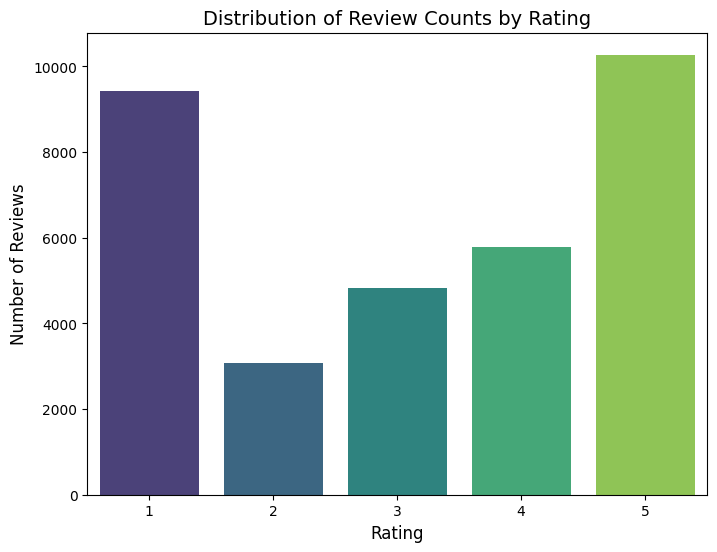

In [ ]:
print("\n----- Start Section 3: Exploratory Data Analysis (EDA) -----")
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Counts by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

### 📊 Nhận xét

Biểu đồ trên thể hiện **phân bố số lượng đánh giá theo từng mức rating (từ 1 đến 5 sao)**.  
Ta có thể nhận thấy rằng:

- **Rating 1 và 5 chiếm tỷ lệ cao nhất**, cho thấy xu hướng đánh giá **phân cực** – người dùng thường hoặc rất hài lòng, hoặc rất không hài lòng.  
- **Các mức 2, 3 và 4** có số lượng đánh giá thấp hơn đáng kể, thể hiện rằng **phản hồi trung lập ít xuất hiện**.  
- Phân bố này **không đồng đều**, do đó trong quá trình huấn luyện mô hình dự đoán cảm xúc, cần xem xét các kỹ thuật như **cân bằng lớp (class weighting)** hoặc **lấy mẫu lại (resampling)** để giảm thiểu sai lệch dữ liệu.


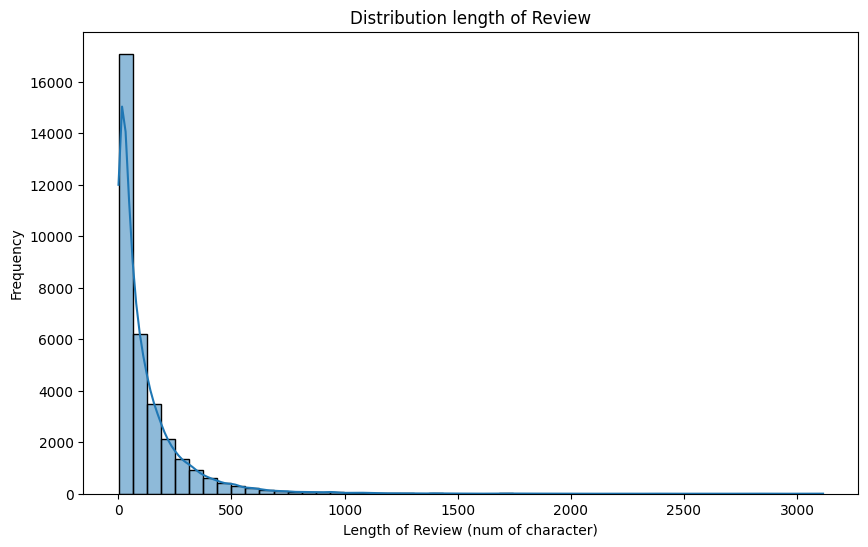

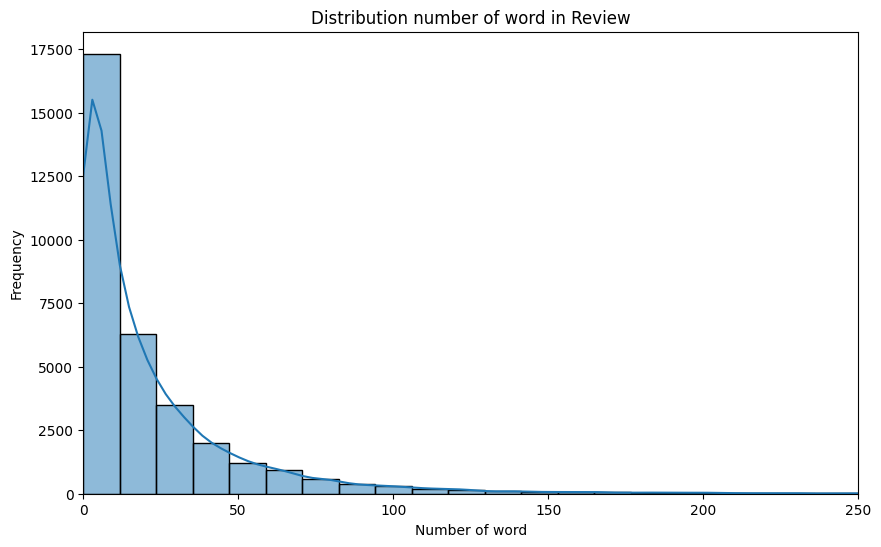

In [ ]:
  # --- 3.2 Phân tích độ dài của các bài review (theo số ký tự) ---
df['review_length'] = df['review'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution length of Review')
plt.xlabel('Length of Review (num of character)')
plt.ylabel('Frequency')
plt.show()

  # --- 3.3 Thống kê số lượng từ trong mỗi review ---
def simple_clean(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

df['cleaned_review_temp'] = df['review'].apply(simple_clean)
df['word_count'] = df['cleaned_review_temp'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution number of word in Review')
plt.xlabel('Number of word')
plt.ylabel('Frequency')
plt.xlim(0, 250) # Giới hạn trục x để dễ quan sát hơn
plt.show()

### **Phân Tích Phân Phối Dữ Liệu Review**
**1. Biểu Đồ Phân Phối Độ Dài Review (Số Lượng Ký Tự)**

*   **Nhận xét:**
    *   Biểu đồ cho thấy phân phối của độ dài review bị **lệch phải** (positively skewed) một cách rõ rệt. Điều này có nghĩa là phần lớn các review có độ dài ngắn, tập trung chủ yếu ở khoảng dưới 500 ký tự.
    *   Tần suất cao nhất tập trung ở những review có độ dài rất ngắn (khoảng dưới 250 ký tự), sau đó giảm nhanh chóng khi độ dài tăng lên.
    *   Phần đuôi của phân phối kéo dài về phía bên phải, cho thấy sự tồn tại của một số ít review có độ dài rất lớn, có thể lên tới hơn 3000 ký tự, nhưng số lượng này không đáng kể so với tổng thể.

**2. Biểu Đồ Phân Phối Số Lượng Từ Trong Review**
*   **Nhận xét:**
    *   Tương tự như biểu đồ độ dài ký tự, phân phối số lượng từ cũng thể hiện rõ xu hướng **lệch phải**.
    *   Đa số các review có số lượng từ tương đối ít, tập trung đông đảo ở khoảng dưới 50 từ. Cột cao nhất cho thấy phần lớn review có ít hơn 25 từ.
    *   Khi số lượng từ tăng lên, tần suất xuất hiện giảm mạnh. Mặc dù có những review chứa đến hơn 200 từ, chúng chỉ chiếm một tỷ lệ rất nhỏ trong toàn bộ tập dữ liệu.


/tmp/ipython-input-1515047954.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='plasma')


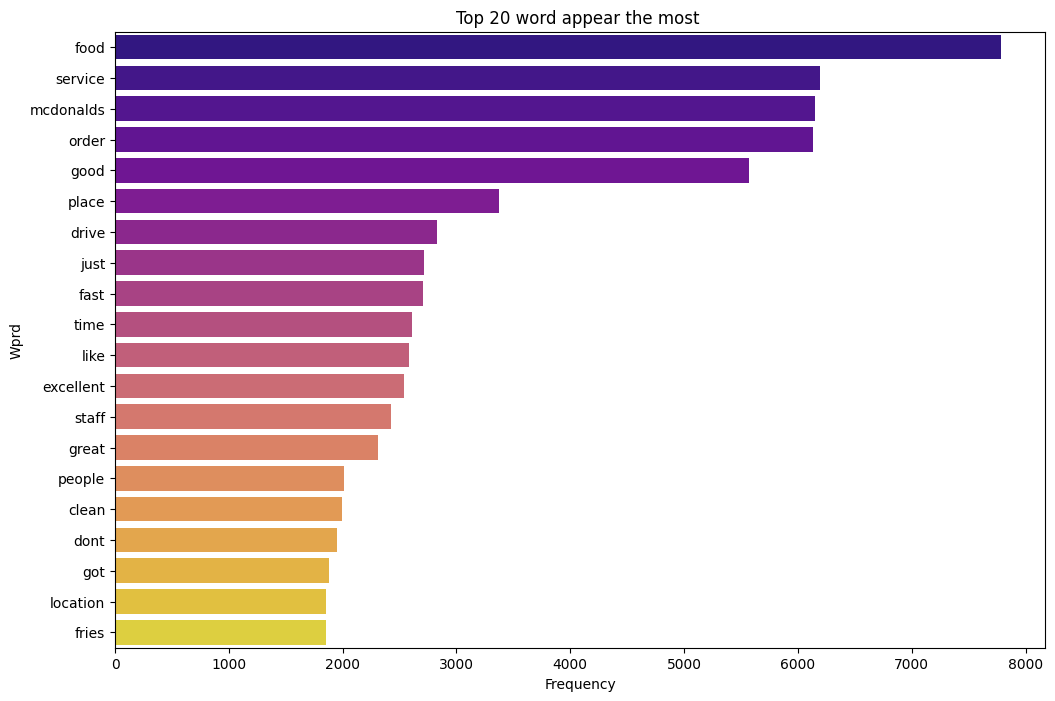

In [ ]:
# --- 3.4 Phân tích tần suất từ (Top 20 từ phổ biến nhất) ---
# Sử dụng CountVectorizer để tách từ và loại bỏ các stop words (từ phổ biến nhưng ít ý nghĩa như 'the', 'a', 'is')
vec = CountVectorizer(stop_words='english')
bow = vec.fit_transform(df['cleaned_review_temp']) # bow: Bag-of-Words
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Tạo DataFrame từ 20 từ phổ biến nhất
top_words_df = pd.DataFrame(words_freq[:20], columns=['word', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=top_words_df, palette='plasma')
plt.title('Top 20 word appear the most ')
plt.xlabel('Frequency')
plt.ylabel('Wprd')
plt.show()

df = df.drop(columns=['cleaned_review_temp'])

### Nhận xét:
- Các từ đứng đầu như "food", "service", "mcdonalds", "order" và "place" cho thấy rõ ràng chủ đề của các bài đánh giá xoay quanh trải nghiệm tại nhà hàng thức ăn nhanh, cụ thể là McDonald's.

- Sự xuất hiện của các tính từ như "good", "fast", "excellent", "great" và "clean" cung cấp những gợi ý ban đầu về sắc thái tình cảm (sentiment) có trong các bài đánh giá.

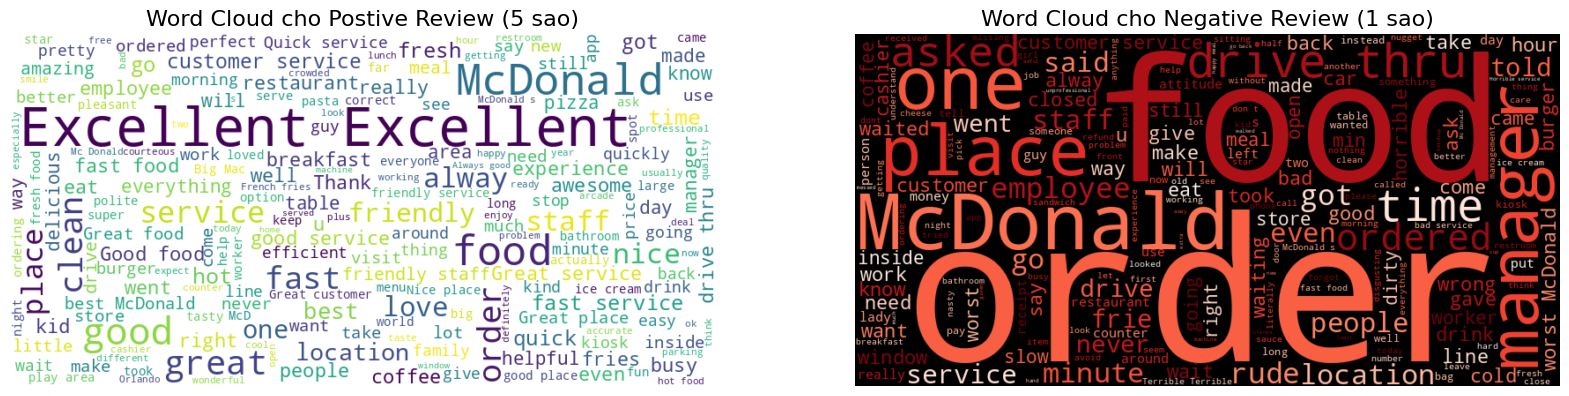

In [ ]:
# --- 3.5 Trực quan hóa từ ngữ phổ biến bằng Word Cloud ---
positive_text = ' '.join(review for review in df[df['rating'] == 5]['review'])
negative_text = ' '.join(review for review in df[df['rating'] == 1]['review'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Word cloud cho review tích cực
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.set_title('Word Cloud cho Postive Review (5 sao)', fontsize=16)
ax1.axis('off')

# Word cloud cho review tiêu cực
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.set_title('Word Cloud cho Negative Review (1 sao)', fontsize=16)
ax2.axis('off')

plt.show()

### **Phân Tích Word Cloud Theo Từng Loại Review**
#### **1. Word Cloud cho Review Tích Cực (5 sao)**
**Nhận xét:**
*   Các từ có kích thước lớn và nổi bật nhất là **"Excellent"**, **"McDonald"**, **"good"**, **"food"**, **"great"**, **"service"**.
*   Các tính từ mang sắc thái tích cực xuất hiện với tần suất cao, ví dụ như: **"fast"** (nhanh), **"friendly"** (thân thiện), **"clean"** (sạch sẽ), **"nice"** (tốt), **"love"** (yêu thích), **"delicious"** (ngon).
*   Điều này cho thấy các khách hàng hài lòng thường đánh giá cao về chất lượng đồ ăn, tốc độ phục vụ nhanh chóng, thái độ thân thiện của nhân viên và sự sạch sẽ của nhà hàng.

#### **2. Word Cloud cho Review Tiêu Cực (1 sao)**
**Nhận xét:**
*   Mặc dù các từ chung chung như **"food"**, **"order"**, **"McDonald"** vẫn xuất hiện nhiều, các từ mang sắc thái tiêu cực và mô tả vấn đề lại chiếm ưu thế.
*   Các từ nổi bật phản ánh sự không hài lòng bao gồm: **"cold"** (nguội), **"rude"** (thô lỗ), **"wrong"** (sai), **"bad service"** (dịch vụ tệ), **"worst"** (tồi tệ nhất).
*   Các từ như **"time"**, **"minute"**, **"wait"** (chờ đợi) cho thấy thời gian chờ đợi lâu là một trong những nguyên nhân chính gây ra trải nghiệm không tốt.
*   Các từ như **"told"**, **"asked"** có thể ám chỉ đến các vấn đề trong giao tiếp hoặc khiếu nại với nhân viên (**"employee"**, **"manager"**).

## MỤC 4: TIỀN XỬ LÝ DỮ LIỆU & PHÂN CHIA DATA TRAIN/TEST

In [ ]:
print("\n----- Bắt đầu Mục 4: Tiền xử lý & Phân chia dữ liệu -----")
# --- 4.1 Xử lý giá trị thiếu ---
print("Kiểm tra giá trị thiếu trong cột 'review':")
print(df['review'].isnull().sum())

print(f"\nKích thước DataFrame trước khi xử lý: {df.shape}")

# Loại bỏ các hàng có review bị thiếu (nếu có)
df.dropna(subset=['review'], inplace=True)

print(f"Kích thước DataFrame sau khi xử lý: {df.shape}")


# --- 4.2 Xây dựng hàm làm sạch văn bản ---
def clean_text(text):
    """
    Hàm làm sạch văn bản bằng cách:
    1. Chuyển thành chữ thường.
    2. Loại bỏ các ký tự đặc biệt (chỉ giữ lại chữ, số và khoảng trắng).
    3. Loại bỏ các khoảng trắng thừa.
    """
    # Chuyển thành chữ thường
    text = text.lower()
    # Loại bỏ các ký tự không phải chữ cái, số
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Loại bỏ khoảng trắng thừa
    text = ' '.join(text.split())
    return text

print("\nĐã định nghĩa hàm clean_text.")


# --- 4.3 Áp dụng hàm làm sạch ---
# Áp dụng hàm lên cột 'review' để tạo cột mới 'cleaned_review'
df['cleaned_review'] = df['review'].apply(clean_text)

print("\n----- So sánh 5 dòng đầu tiên của 'review' và 'cleaned_review' -----")
print(df[['review', 'cleaned_review']].head())


# --- 4.4 Phân chia dữ liệu ---
X = df['cleaned_review']
df['label'] = df['rating'] - 1
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n----- Kích thước của các tập dữ liệu sau khi chia -----")
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)


----- Bắt đầu Mục 4: Tiền xử lý & Phân chia dữ liệu -----
Kiểm tra giá trị thiếu trong cột 'review':
0

Kích thước DataFrame trước khi xử lý: (33396, 12)
Kích thước DataFrame sau khi xử lý: (33396, 12)

Đã định nghĩa hàm clean_text.

----- So sánh 5 dòng đầu tiên của 'review' và 'cleaned_review' -----
                                              review  \
0  Why does it look like someone spit on my food?...   
1  It'd McDonalds. It is what it is as far as the...   
2  Made a mobile order got to the speaker and che...   
3  My mc. Crispy chicken sandwich was �����������...   
4  I repeat my order 3 times in the drive thru, a...   

                                      cleaned_review  
0  why does it look like someone spit on my food ...  
1  itd mcdonalds it is what it is as far as the f...  
2  made a mobile order got to the speaker and che...  
3  my mc crispy chicken sandwich was customer ser...  
4  i repeat my order 3 times in the drive thru an...  

----- Kích thước của các tập

## MỤC 5: CONFIG PIPELINE
Cell này định nghĩa một loạt các thí nghiệm học máy để giải quyết bài toán phân loại văn bản, được chia thành ba nhóm chính:

#### **1. Các Pipeline Machine Learning Truyền Thống (`sklearn_pipelines`)**
Đây là nhóm các thí nghiệm kết hợp những phương pháp trích xuất đặc trưng cổ điển với các mô hình máy học cơ bản.
*   **Phương pháp trích xuất đặc trưng:**
    *   **Bag-of-Words (BoW):** Thử nghiệm với các n-gram khác nhau (unigram, bigram, trigram).
    *   **TF-IDF:** Tương tự, cũng được thử nghiệm với unigram, bigram, và trigram.
*   **Mô hình được sử dụng:**
    *   **Multinomial Naive Bayes**
    *   **Logistic Regression** (Hồi quy Logistic)
    *   **Linear SVC** (Support Vector Classifier với kernel tuyến tính)
*   **Đặc trưng từ BERT:** Thử nghiệm thêm việc sử dụng embedding tĩnh (static embedding) từ token `[CLS]` của mô hình **DistilBERT** làm đầu vào cho `Logistic Regression` và `Linear SVC`.

#### **2. Các Pipeline Deep Learning (`dl_pipelines`)**
Nhóm này tập trung vào việc sử dụng các mô hình học sâu với đặc trưng là chuỗi embedding từ BERT.
*   **Phương pháp trích xuất đặc trưng:**
    *   Sử dụng chuỗi embedding từ mô hình **DistilBERT** (với độ dài tối đa là 32 token) làm đầu vào.
*   **Kiến trúc mô hình:**
    *   **RNN** (Recurrent Neural Network)
    *   **LSTM** (Long Short-Term Memory)
*   **Tối ưu hóa:** Cấu hình không gian tìm kiếm siêu tham số (Hyperparameter Optimization - HPO) cho các mô hình này.

#### **3. Pipeline Fine-tuning (`finetune_pipelines`)**
Thí nghiệm này tập trung vào phương pháp hiện đại nhất là tinh chỉnh (fine-tuning) một mô hình ngôn ngữ lớn.
*   **Mô hình cơ sở:** Sử dụng một mô hình đã được huấn luyện trước có tên là **"YELP-Review_Classifier"**.
*   **Phương pháp:** Tinh chỉnh trực tiếp toàn bộ mô hình trên tập dữ liệu của bài toán.

In [ ]:
EXPERIMENT_CONFIG = {
    "settings": {
        "use_cache": True,
        "cache_path": "BTL2/features"
    },
    "sklearn_pipelines": [
        # --- BoW Unigram ---
        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_unigram.npz",
                                               "test_file": "BTL2/features/bow_test_unigram.npz"}},
         "model": {"name": "multinomial_nb"}},

        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_unigram.npz",
                                               "test_file": "BTL2/features/bow_test_unigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_unigram.npz",
                                               "test_file": "BTL2/features/bow_test_unigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- BoW Bigram ---
        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 2), "max_features": 30000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_bigram.npz",
                                               "test_file": "BTL2/features/bow_test_bigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 2), "max_features": 30000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_bigram.npz",
                                               "test_file": "BTL2/features/bow_test_bigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- BoW Trigram ---
        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 3), "max_features": 40000},
                               "precomputed": {"train_file": "features/bow_train_trigram.npz",
                                               "test_file": "features/bow_test_trigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "bow", "params": {"ngram_range": (1, 3), "max_features": 40000},
                               "precomputed": {"train_file": "BTL2/features/bow_train_trigram.npz",
                                               "test_file": "BTL2/features/bow_test_trigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- TF-IDF Unigram ---
        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "features/tfidf_train_unigram.npz",
                                               "test_file": "features/tfidf_test_unigram.npz"}},
         "model": {"name": "multinomial_nb"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "features/tfidf_train_unigram.npz",
                                               "test_file": "features/tfidf_test_unigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 1), "max_features": 20000},
                               "precomputed": {"train_file": "BTL2/features/tfidf_train_unigram.npz",
                                               "test_file": "BTL2/features/tfidf_test_unigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- TF-IDF Bigram ---
        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 2), "max_features": 30000},
                               "precomputed": {"train_file": "features/tfidf_train_bigram.npz",
                                               "test_file": "features/tfidf_test_bigram.npz"}},
         "model": {"name": "multinomial_nb"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 2), "max_features": 30000},
                               "precomputed": {"train_file": "BTL2/features/tfidf_train_bigram.npz",
                                               "test_file": "BTL2/eatures/tfidf_test_bigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 2), "max_features": 30000},
                               "precomputed": {"train_file": "features/tfidf_train_bigram.npz",
                                               "test_file": "features/tfidf_test_bigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- TF-IDF Trigram ---
        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 3), "max_features": 40000},
                               "precomputed": {"train_file": "BTL2/features/tfidf_train_trigram.npz",
                                               "test_file": "BTL2/features/tfidf_test_trigram.npz"}},
         "model": {"name": "multinomial_nb"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 3), "max_features": 40000},
                               "precomputed": {"train_file": "BTL2/features/tfidf_train_trigram.npz",
                                               "test_file": "BTL2/features/tfidf_test_trigram.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "tfidf", "params": {"ngram_range": (1, 3), "max_features": 40000},
                               "precomputed": {"train_file": "BTL2/features/tfidf_train_trigram.npz",
                                               "test_file": "BTL2/features/tfidf_test_trigram.npz"}},
         "model": {"name": "linear_svc"}},

        # --- BERT Static Embedding ---
        {"feature_extractor": {"name": "bert_cls", "params": {"model_name": "distilbert-base-uncased"},
                               "precomputed": {"file": "BTL2/features/bert_static.npz"}},
         "model": {"name": "logistic_regression"}},

        {"feature_extractor": {"name": "bert_cls", "params": {"model_name": "distilbert-base-uncased"},
                               "precomputed": {"file": "BTL2/features/bert_static.npz"}},
         "model": {"name": "linear_svc"}}
    ],

    # Deep Learning models
    "dl_pipelines": [
        {"feature_extractor": {"name": "bert_sequence", "params": {"model_name": "distilbert-base-uncased", "max_len": 32},
                               "precomputed": {"file": "BTL2/features/bert_sequence.npz"}},
         "model": {"name": "rnn", "hpo_space": {"hidden_dim": [256],
                                                "num_layers": [3],
                                                "dropout": [0.5],
                                                "lr": loguniform(5e-5, 1e-3)},
                   "retrain": False, "result_path": "BTL2/results/rnn_results.csv"}},

        {"feature_extractor": {"name": "bert_sequence", "params": {"model_name": "distilbert-base-uncased", "max_len": 32},
                               "precomputed": {"file": "BTL2/features/bert_sequence.npz"}},
         "model": {"name": "lstm", "hpo_space": {"hidden_dim": [256],
                                                 "num_layers": [3],
                                                 "dropout": [0.5],
                                                 "lr": loguniform(5e-5, 1e-3)},
                   "retrain": False, "result_path": "BTL2/results/lstm_results.csv"}}
    ],

    # Finetune pipeline
    "finetune_pipelines": [
        {"feature_extractor": {"name": "finetune_embedding", "params": {"model_name": "YELP-Review_Classifier", "max_len": 128},
                               "checkpoint_path": "BTL2/model"},
         "model": {"name": "finetune", "checkpoint_path": "BTL2/model", "retrain": False, "result_path": "BTL2/results/finetune_results.csv"}}
    ]
}

## MỤC 6: Thực thi Pipeline

In [ ]:
print("\n----- Bắt đầu Mục 6: Thực thi pipeline hợp nhất -----")
runner = ExperimentRunner(config=EXPERIMENT_CONFIG)
final_results_df = runner.run_all_experiments(X_train, y_train, X_test, y_test)

print("\n----- TẤT CẢ CÁC THỬ NGHIỆM ĐÃ HOÀN TẤT! -----")
print("Bảng kết quả tổng hợp:")
display(final_results_df)


----- Bắt đầu Mục 6: Thực thi pipeline hợp nhất -----

Running Pipeline 1/21: pipeline_0_bow_unigram_multinomial_nb
  Loading precomputed features from BTL2/features/bow_train_unigram.npz and BTL2/features/bow_test_unigram.npz
✓ Pipeline completed successfully
  Test F1 Macro: 0.5513
  Test Accuracy: 0.6466

Running Pipeline 2/21: pipeline_1_bow_unigram_logistic_regression
  Loading precomputed features from BTL2/features/bow_train_unigram.npz and BTL2/features/bow_test_unigram.npz
✓ Pipeline completed successfully
  Test F1 Macro: 0.5969
  Test Accuracy: 0.6659

Running Pipeline 3/21: pipeline_2_bow_unigram_linear_svc
  Loading precomputed features from BTL2/features/bow_train_unigram.npz and BTL2/features/bow_test_unigram.npz


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✓ Pipeline completed successfully
  Test F1 Macro: 0.5945
  Test Accuracy: 0.6576

Running Pipeline 4/21: pipeline_3_bow_bigram_logistic_regression
  Loading precomputed features from BTL2/features/bow_train_bigram.npz and BTL2/features/bow_test_bigram.npz
✓ Pipeline completed successfully
  Test F1 Macro: 0.6432
  Test Accuracy: 0.7034

Running Pipeline 5/21: pipeline_4_bow_bigram_linear_svc
  Loading precomputed features from BTL2/features/bow_train_bigram.npz and BTL2/features/bow_test_bigram.npz


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✓ Pipeline completed successfully
  Test F1 Macro: 0.6207
  Test Accuracy: 0.6781

Running Pipeline 6/21: pipeline_5_bow_trigram_logistic_regression
  Building features using bow
✓ Pipeline completed successfully
  Test F1 Macro: 0.6404
  Test Accuracy: 0.7019

Running Pipeline 7/21: pipeline_6_bow_trigram_linear_svc
  Loading precomputed features from BTL2/features/bow_train_trigram.npz and BTL2/features/bow_test_trigram.npz
✓ Pipeline completed successfully
  Test F1 Macro: 0.6277
  Test Accuracy: 0.6840

Running Pipeline 8/21: pipeline_7_tfidf_unigram_multinomial_nb
  Building features using tfidf
✓ Pipeline completed successfully
  Test F1 Macro: 0.4793
  Test Accuracy: 0.6195

Running Pipeline 9/21: pipeline_8_tfidf_unigram_logistic_regression
  Loading precomputed features from features/tfidf_train_unigram.npz and features/tfidf_test_unigram.npz
✓ Pipeline completed successfully
  Test F1 Macro: 0.5645
  Test Accuracy: 0.6642

Running Pipeline 10/21: pipeline_9_tfidf_unigram_line

,pipeline_id,feature_extractor_name,model_name,train_time_s,inference_time_s,total_time_s,model_artifact_path,test_f1_macro,test_accuracy,test_precision_macro,test_recall_macro
20,pipeline_20_finetune_embedding_finetune,finetune_embedding,finetune,NaN,35.532598,NaN,./BTL2/model,0.668167,0.721257,0.671062,0.667202
3,pipeline_3_bow_bigram_logistic_regression,bow,logistic_regression,24.932142,0.008573,25.043882,./artifacts/pipeline_3_bow_bigram_logistic_reg...,0.643169,0.703443,0.659899,0.633679
5,pipeline_5_bow_trigram_logistic_regression,bow,logistic_regression,25.352371,0.011059,31.828226,./artifacts/pipeline_5_bow_trigram_logistic_re...,0.640409,0.701946,0.657003,0.631086
12,pipeline_12_tfidf_bigram_linear_svc,tfidf,linear_svc,2.319212,0.002879,2.495083,./artifacts/pipeline_12_tfidf_bigram_linear_sv...,0.637862,0.704341,0.661562,0.626918
15,pipeline_15_tfidf_trigram_linear_svc,tfidf,linear_svc,2.316993,0.003333,2.473044,./artifacts/pipeline_15_tfidf_trigram_linear_s...,0.634455,0.701796,0.655731,0.624522
19,pipeline_19_bert_sequence_lstm,bert_sequence,lstm,1753.213593,4.211445,1783.194358,./artifacts/pipeline_1_bert_sequence_lstm.h5,0.630585,0.686677,0.633278,0.629615
6,pipeline_6_bow_trigram_linear_svc,bow,linear_svc,140.308111,0.004308,140.424224,./artifacts/pipeline_6_bow_trigram_linear_svc....,0.627659,0.683982,0.634531,0.622837
4,pipeline_4_bow_bigram_linear_svc,bow,linear_svc,202.225645,0.004217,202.327341,./artifacts/pipeline_4_bow_bigram_linear_svc.j...,0.620732,0.678144,0.627069,0.616512
1,pipeline_1_bow_unigram_logistic_regression,bow,logistic_regression,18.608395,0.006930,18.683597,./artifacts/pipeline_1_bow_unigram_logistic_re...,0.596916,0.665868,0.615481,0.588499
2,pipeline_2_bow_unigram_linear_svc,bow,linear_svc,154.131530,0.009765,154.252153,./artifacts/pipeline_2_bow_unigram_linear_svc....,0.594485,0.657635,0.605089,0.588416


## MỤC 7: Trực quan hóa Kết quả

/tmp/ipython-input-1991113790.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-1991113790.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)


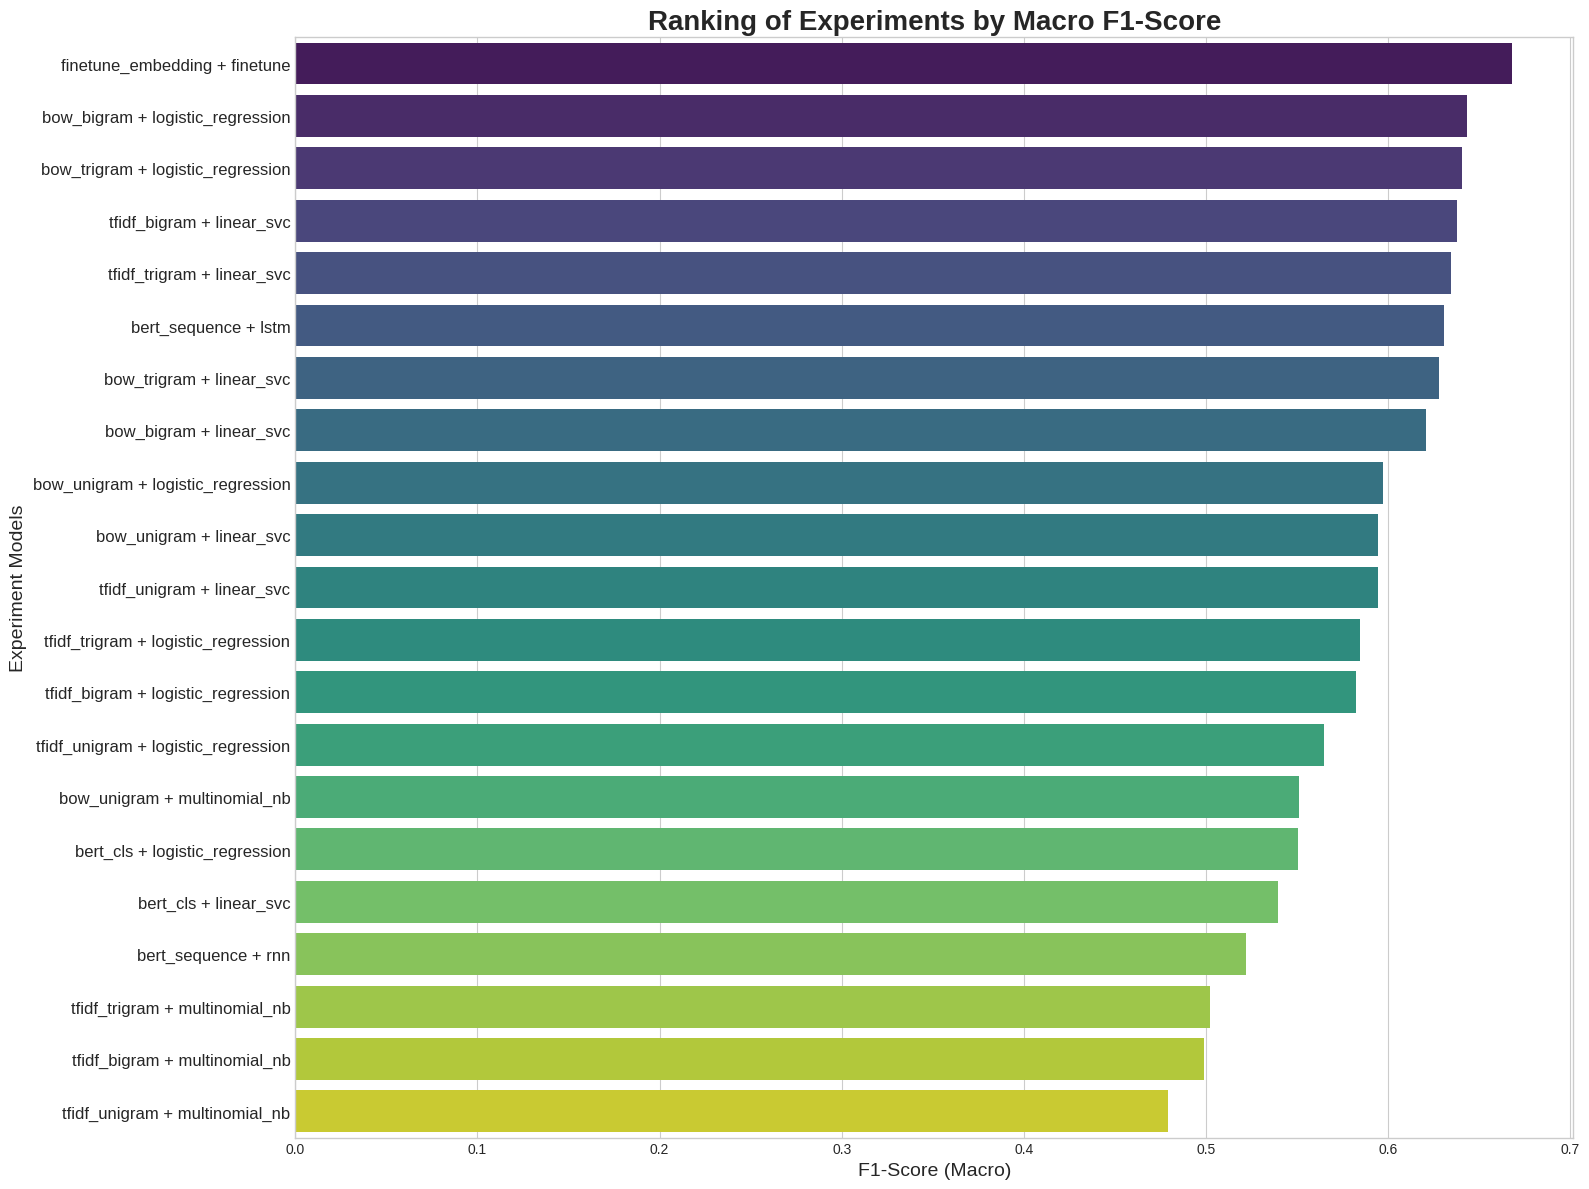

In [ ]:
def create_experiment_name(row):
    feature_name = row['feature_extractor_name']
    model_name = row['model_name']
    pipeline_id = row['pipeline_id']

    if feature_name == 'bow' or feature_name == 'tfidf':
        if 'unigram' in pipeline_id:
            ngram_info = 'unigram'
        elif 'bigram' in pipeline_id:
            ngram_info = 'bigram'
        elif 'trigram' in pipeline_id:
            ngram_info = 'trigram'
        else:
            ngram_info = 'default'
        return f"{feature_name}_{ngram_info} + {model_name}"
    elif feature_name == 'bert_sequence':
        return f"{feature_name} + {model_name}"
    elif feature_name == 'bert_cls':
        return f"{feature_name} + {model_name}"
    else:
        return f"{feature_name} + {model_name}"

final_results_df['experiment_name'] = final_results_df.apply(create_experiment_name, axis=1)
sorted_results = final_results_df.sort_values(by="test_f1_macro", ascending=False)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 12))
barplot = sns.barplot(
    x='test_f1_macro',
    y='experiment_name',
    data=sorted_results,
    errorbar=None,
    palette='viridis',
    orient='h'
)
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)

plt.title('Ranking of Experiments by Macro F1-Score', fontsize=20, fontweight='bold')
plt.xlabel('F1-Score (Macro)', fontsize=14)
plt.ylabel('Experiment Models', fontsize=14)
plt.tight_layout()
plt.show()

### **Tổng Kết và Đánh Giá Kết Quả Thí Nghiệm**

#### **1. Tổng kết hiệu năng các mô hình**

*   **Mô hình hiệu quả nhất:** Phương pháp **Fine-tuning một mô hình ngôn ngữ lớn** (`finetune_embedding + finetune`) cho kết quả vượt trội với Macro F1-Score cao nhất là **0.668**. Điều này khẳng định sức mạnh của việc tinh chỉnh các mô hình pre-trained trên dữ liệu cụ thể của bài toán.

*   **Các mô hình cổ điển vẫn rất mạnh mẽ:** Đáng chú ý, các mô hình như `Logistic Regression` và `Linear SVC` khi kết hợp với đặc trưng **BoW/TF-IDF Bigram và Trigram** cho hiệu năng rất cạnh tranh, bám sát mô hình top đầu nhưng với thời gian huấn luyện nhanh hơn rất nhiều. Điều này cho thấy việc sử dụng n-gram để nắm bắt ngữ cảnh là cực kỳ hiệu quả.

*   **Hiệu suất các phương pháp khác:** Các mô hình Deep Learning như **LSTM** cho kết quả khá nhưng yêu cầu thời gian huấn luyện lớn. Ngược lại, việc chỉ dùng embedding tĩnh từ BERT (`bert_cls`) hoặc mô hình RNN cơ bản cho hiệu suất thấp hơn đáng kể.

#### **2. Giải thích tại sao điểm số chưa quá cao**

Mức điểm Macro F1-Score ~0.67 là hợp lý do các yếu tố sau:

1.  **Bài toán phân loại 5 lớp có độ khó cao:** Việc phân biệt giữa các lớp liền kề (ví dụ: 3 sao "tạm được" và 4 sao "tốt") là rất khó khăn và mang tính chủ quan, không rõ ràng như phân loại 2 lớp (tích cực/tiêu cực).
2.  **Sự mất cân bằng dữ liệu (Data Imbalance):** Thường thì số lượng review 5 sao và 1 sao chiếm đa số, trong khi các lớp ở giữa có ít mẫu hơn. Điều này khiến mô hình khó học trên các lớp thiểu số, ảnh hưởng đến điểm Macro F1-Score (vốn tính trung bình hiệu suất trên tất cả các lớp).
3.  **Tính phức tạp của ngôn ngữ:** Các review thường ngắn, có thể chứa sự mỉa mai, lỗi chính tả hoặc từ ngữ không rõ ràng, tạo ra thách thức lớn cho mô hình trong việc hiểu đúng ngữ nghĩa.

/tmp/ipython-input-142217843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_results_df, x='feature_extractor_name', y='test_f1_macro', palette='coolwarm')


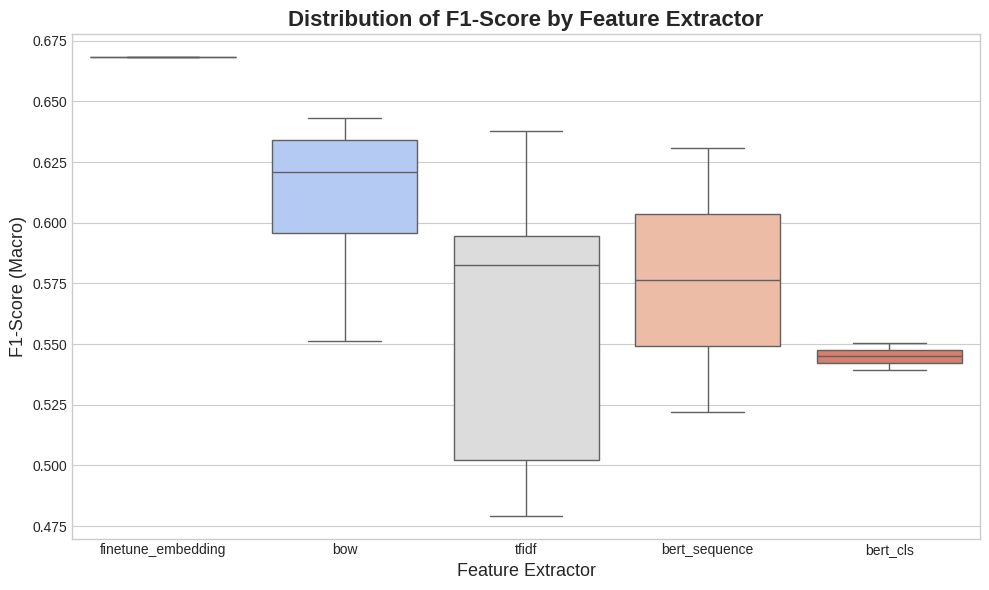

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_results_df, x='feature_extractor_name', y='test_f1_macro', palette='coolwarm')
plt.title('Distribution of F1-Score by Feature Extractor', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extractor', fontsize=13)
plt.ylabel('F1-Score (Macro)', fontsize=13)
plt.tight_layout()
plt.show()

> 📈 **Nhận xét: Phân bố F1-Score theo từng phương pháp trích xuất đặc trưng**  
> Biểu đồ cho thấy sự khác biệt đáng kể về hiệu suất giữa các nhóm phương pháp trích xuất đặc trưng.  
> - **BoW** và **TF-IDF** có phân bố F1-Score khá ổn định, dao động quanh mức trung bình, thể hiện tính hiệu quả của các phương pháp truyền thống trong bài toán phân loại văn bản cơ bản.  
> - **BERT (CLS và Sequence)** có mức dao động lớn hơn — một số pipeline đạt F1 cao, trong khi các pipeline khác lại thấp đáng kể. Điều này phản ánh độ phức tạp và nhạy cảm của mô hình BERT với quá trình fine-tuning, dữ liệu và siêu tham số.  
> - Nhìn chung, **mô hình fine-tune embedding** đạt điểm F1 cao nhất, chứng minh lợi thế của việc huấn luyện lại tầng embedding phù hợp với tập dữ liệu cụ thể.  
> - Sự chênh lệch giữa các nhóm cũng nhấn mạnh rằng không phải mô hình phức tạp luôn vượt trội, mà việc lựa chọn pipeline phù hợp và cân bằng giữa độ chính xác – chi phí huấn luyện mới là yếu tố quan trọng.


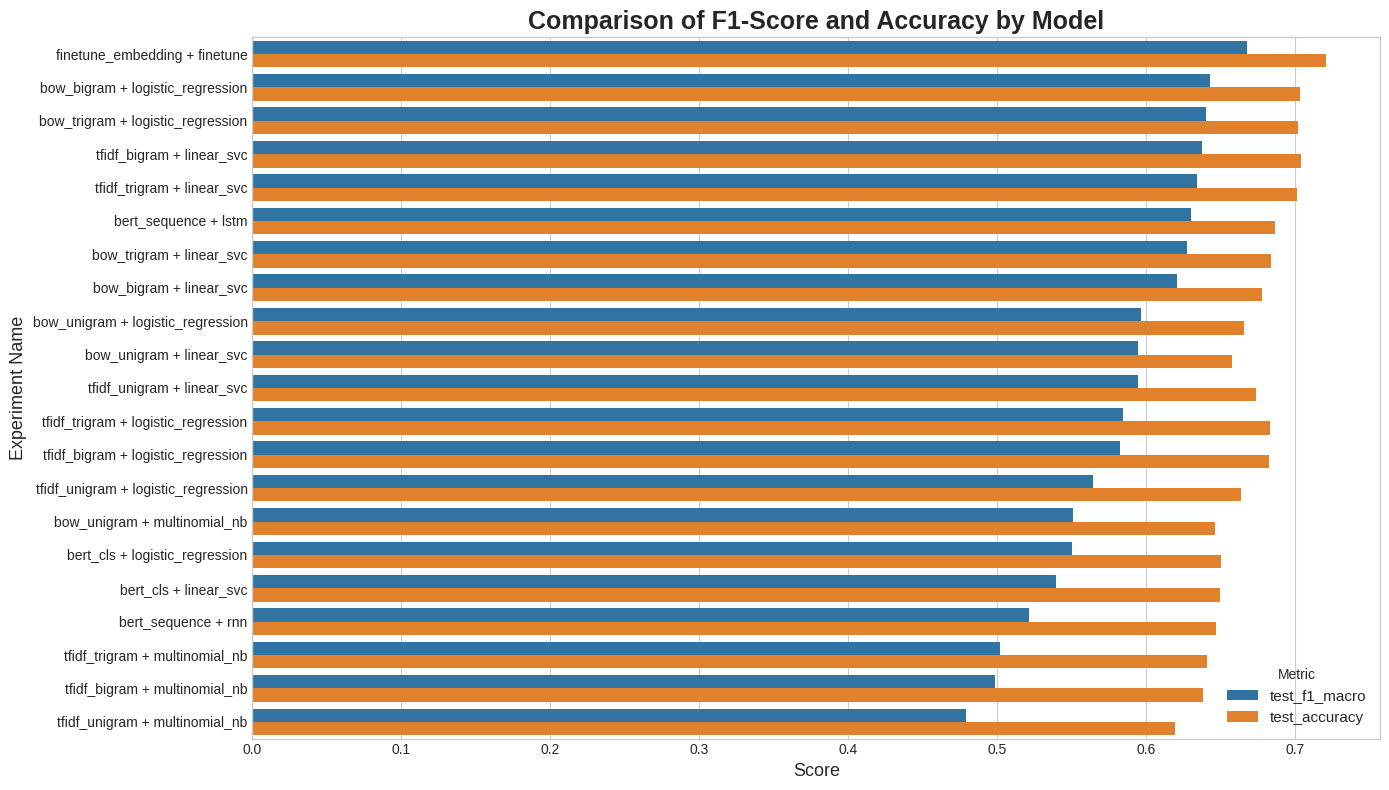

In [ ]:
metrics_df = final_results_df.melt(
    id_vars='experiment_name',
    value_vars=['test_f1_macro', 'test_accuracy'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(14, 8))
sns.barplot(data=metrics_df, x='Score', y='experiment_name', hue='Metric', orient='h')
plt.title('Comparison of F1-Score and Accuracy by Model', fontsize=18, fontweight='bold')
plt.xlabel('Score', fontsize=13)
plt.ylabel('Experiment Name', fontsize=13)
plt.legend(title='Metric', fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3376399174.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3376399174.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


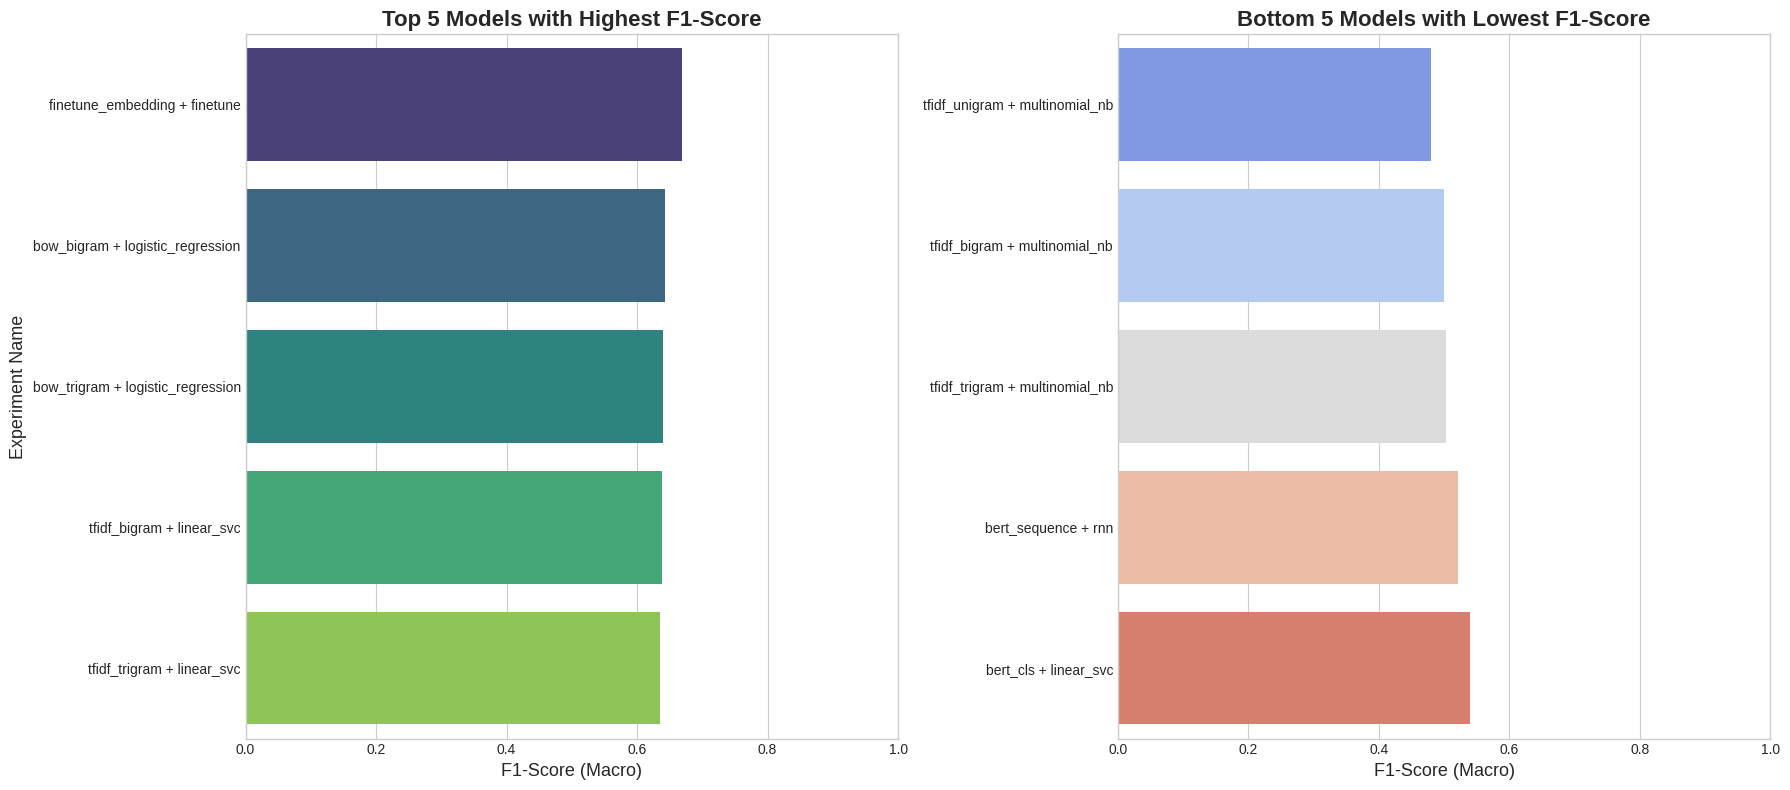

In [ ]:
top5 = sorted_results.head(5)
bottom5 = sorted_results.tail(5)

# Create side-by-side plots
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Left: Top 5 models ---
sns.barplot(
    data=top5,
    x='test_f1_macro',
    y='experiment_name',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Top 5 Models with Highest F1-Score', fontsize=16, fontweight='bold')
axes[0].set_xlabel('F1-Score (Macro)', fontsize=13)
axes[0].set_ylabel('Experiment Name', fontsize=13)
axes[0].set_xlim(0, 1)

# --- Right: Bottom 5 models ---
sns.barplot(
    data=bottom5.sort_values(by='test_f1_macro', ascending=True),
    x='test_f1_macro',
    y='experiment_name',
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Bottom 5 Models with Lowest F1-Score', fontsize=16, fontweight='bold')
axes[1].set_xlabel('F1-Score (Macro)', fontsize=13)
axes[1].set_ylabel('')
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

> 🏆 **Top 5 Models with Highest F1-Score**  
> - Nhóm mô hình này đạt hiệu suất vượt trội, nổi bật là **fine-tuned embedding model**, cho thấy việc điều chỉnh embedding theo dữ liệu giúp cải thiện đáng kể khả năng phân loại cảm xúc.  
> - Các pipeline sử dụng **BoW/TF-IDF kết hợp Logistic Regression hoặc Linear SVC** cũng duy trì kết quả ổn định, chứng minh rằng các mô hình truyền thống vẫn rất hiệu quả với dữ liệu dạng văn bản ngắn.

---

> ⚠️ **Bottom 5 Models with Lowest F1-Score**  
> - Các mô hình có điểm F1 thấp nhất chủ yếu là **Multinomial Naive Bayes** hoặc **BERT chưa fine-tune đầy đủ**, cho thấy hạn chế của việc giả định độc lập từ trong Naive Bayes và độ phức tạp của BERT khi thiếu tối ưu.  
> - Hiệu suất thấp cũng phản ánh khó khăn khi phân loại 5 mức sao (1–5), nơi ranh giới giữa các nhãn gần nhau dễ gây nhầm lẫn.
